The purpose of this notebook is to investigate (by eye) whether the most closely related communities "make sense".

This is specifically to see if we can find a better way to relate full column reflux with bal-gastric JSD

We'll want to look at the patients with most and least similar BAL and gastric lung communities across all patients, as well as the min/max within just the subgroup that has reflux metadata as well.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# to pretty print dataframes
from IPython.display import display

In [2]:
# Raw data
fnotu = '/Users/claire/github/aspiration-analysis/data/clean/rosen.otu_table.clean'
fnmeta = '/Users/claire/github/aspiration-analysis/data/clean/rosen.metadata.clean'

df = pd.read_csv(fnotu, sep='\t', index_col=0)
meta = pd.read_csv(fnmeta, sep='\t', index_col=0)

# JSD
fnjsd = '/Users/claire/github/aspiration-analysis/data/analysis/jsd.txt'
jsd = pd.read_csv(fnjsd, sep='\t').dropna(how='all', axis=1)
jsd = jsd.query('patient_comp == "within"')

# Seed random state
random_state = 12345

/Users/claire/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,19,20,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
jsd.head()

,sample1,sample2,jsd,site1,site2,site_comparison,patient_comp,subject,Results of MBS closest to enrollment date,Results of worst MBS,...,percent distal acid,percent proximal acid,percent proximal nonacid,percent distal total,number of full colum events/total events,Number of full column episodes,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?
0,01-112-7GI,01-112-7RI,0.399298,gastric_fluid,rectal_swab,gastric_rectalswab,within,01-112-7,NaN,NaN,...,n/a,n/a,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN
1,01-112-7GI,01-112-7TI,0.991109,gastric_fluid,throat_swab,throat_gastric,within,01-112-7,NaN,NaN,...,n/a,n/a,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN
627,01-112-7RI,01-112-7TI,0.987175,rectal_swab,throat_swab,throat_rectalswab,within,01-112-7,NaN,NaN,...,n/a,n/a,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN
1878,01-164-7GI,01-164-7RI,0.993498,gastric_fluid,rectal_swab,gastric_rectalswab,within,01-164-7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,01-164-7GI,01-164-7TI,0.091681,gastric_fluid,throat_swab,throat_gastric,within,01-164-7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
balgas = jsd.query('site_comparison == "bal_gastric"').sort_values(by='jsd')
balgas.shape

(122, 36)

In [5]:
len(balgas['subject'].unique())

122

In [6]:
s1 = balgas.iloc[0]['sample1']
s2 = balgas.iloc[0]['sample2']

04-081-3B
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo6
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__;d__denovo15
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo87
k__Bacteria;p__Firmicutes;c__Erysipelotrichia;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Clostridium_XVIII;s__;d__denovo76
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Ruminococcus2;s__;d__denovo57


04-113-7B
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo6
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__;d__denovo15
k__Bacteria;p__Firmicutes;c__Erysipelotrichia;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Clostridium_XVIII;s__;d__denovo76
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidale

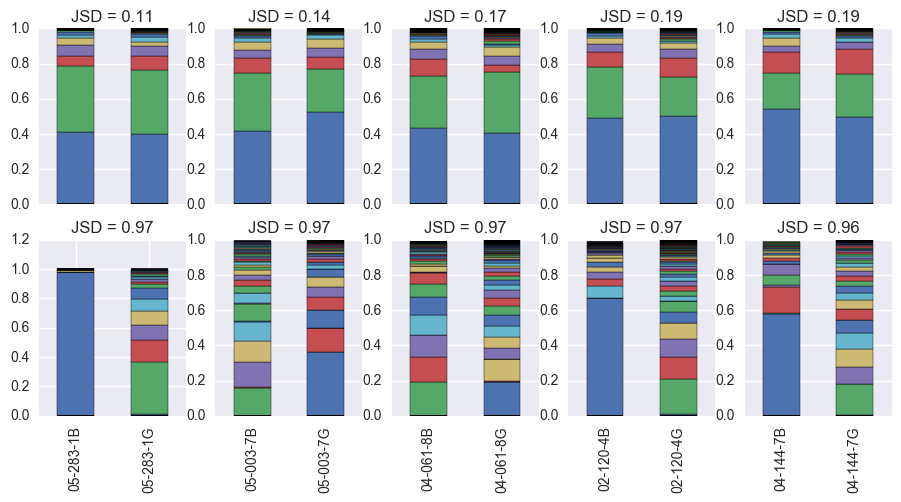

In [22]:
fig, ax = plt.subplots(2,5, figsize=(11,5))

for i in range(5):
    # Most similar
    s1 = balgas.iloc[i]['sample1']
    s2 = balgas.iloc[i]['sample2']
    cols = df.loc[[s1, s2]].sum().sort_values(ascending=False).index
    df.loc[[s1, s2], cols].plot(kind='bar', stacked=True, legend=False, ax=ax[0, i])
    ax[0, i].set_title('JSD = {:.2f}'.format(balgas.iloc[i]['jsd']))
    ax[0, i].set_xticklabels(['',''])
    print(s1)
    print('\n'.join(cols[0:5]))
    print('\n')
    
    # Least similar
    s1 = balgas.iloc[-(i+1)]['sample1']
    s2 = balgas.iloc[-(i+1)]['sample2']
    cols = df.loc[[s1, s2]].sum().sort_values(ascending=False).index
    df.loc[[s1, s2], cols].plot(kind='bar', stacked=True, legend=False, ax=ax[1, i])
    ax[1, i].set_title('JSD = {:.2f}'.format(balgas.iloc[-(i+1)]['jsd']))


04-081-3B
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo6
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__;d__denovo15
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo87
k__Bacteria;p__Firmicutes;c__Erysipelotrichia;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Clostridium_XVIII;s__;d__denovo76
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Ruminococcus2;s__;d__denovo57


04-113-7B
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo6
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__;d__denovo15
k__Bacteria;p__Firmicutes;c__Erysipelotrichia;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Clostridium_XVIII;s__;d__denovo76
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidale

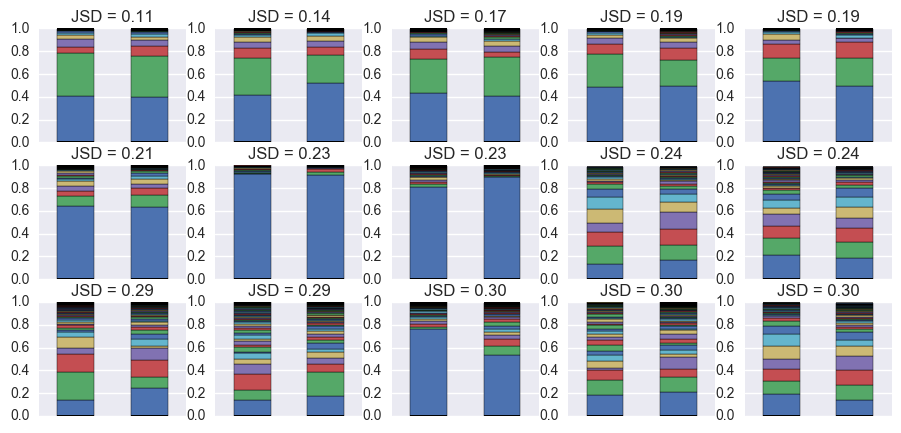

In [24]:
fig, ax = plt.subplots(3,5, figsize=(11,5))
ax = ax.flatten()
for i in range(15):
    # Most similar
    s1 = balgas.iloc[i]['sample1']
    s2 = balgas.iloc[i]['sample2']
    cols = df.loc[[s1, s2]].sum().sort_values(ascending=False).index
    df.loc[[s1, s2], cols].plot(kind='bar', stacked=True, legend=False, ax=ax[i])
    ax[i].set_title('JSD = {:.2f}'.format(balgas.iloc[i]['jsd']))
    ax[i].set_xticklabels(['',''])
    print(s1)
    print('\n'.join(cols[0:5]))
    print('\n')


In [40]:
for i in range(15):
    # Most similar
    s1 = balgas.iloc[i]['sample1']
    s2 = balgas.iloc[i]['sample2']
    cols = df.loc[[s1, s2]].sum().sort_values(ascending=False).index
#    df.loc[[s1, s2], cols].plot(kind='bar', stacked=True, legend=False, ax=ax[i])
    print(s1)
    print('\n'.join(cols[0:5]))
    print('\n')


04-081-3B
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo6
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__;d__denovo15
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo87
k__Bacteria;p__Firmicutes;c__Erysipelotrichia;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Clostridium_XVIII;s__;d__denovo76
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Ruminococcus2;s__;d__denovo57


04-113-7B
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo6
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__;d__denovo15
k__Bacteria;p__Firmicutes;c__Erysipelotrichia;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Clostridium_XVIII;s__;d__denovo76
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidale

In [42]:
thrgas = jsd.query('site_comparison == "throat_gastric"').sort_values(by='jsd')
thrgas.head()

,sample1,sample2,jsd,site1,site2,site_comparison,patient_comp,subject,Results of MBS closest to enrollment date,Results of worst MBS,...,percent distal acid,percent proximal acid,percent proximal nonacid,percent distal total,number of full colum events/total events,Number of full column episodes,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?
1879,01-164-7GI,01-164-7TI,0.091681,gastric_fluid,throat_swab,throat_gastric,within,01-164-7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192692,05-194-1G,05-194-1T,0.227199,gastric_fluid,throat_swab,throat_gastric,within,05-194-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,n/a,NaN,NaN,NaN,NaN
33572,02-143-2G,02-143-2T,0.232732,gastric_fluid,throat_swab,throat_gastric,within,02-143-2,Penetration,Aspiration,...,0.00422734,0.00040522,0.000315934,0.00468864,0.625,15,NQ Not quantifiable,NQ Not quantifiable,ND Not detectable,Yes
94952,03-141-5G,03-141-5T,0.235464,gastric_fluid,throat_swab,throat_gastric,within,03-141-5,NaN,NaN,...,0.00696153846153846,0.00435664335664336,8.62470862470863e-05,0.00741724941724942,0.5,21,NQ Not quantifiable,Yes,ND Not detectable,Yes
129717,04-061-8G,04-061-8T,0.242701,gastric_fluid,throat_swab,throat_gastric,within,04-061-8,Normal,NaN,...,NaN,NaN,NaN,NaN,1,n/a,NaN,NaN,NaN,NaN


01-164-7GI
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella;s__;d__denovo2
k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo8
k__Bacteria;p__Firmicutes;c__Negativicutes;o__Selenomonadales;f__Veillonellaceae;g__Veillonella;s__;d__denovo4
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella;s__;d__denovo36
k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Leptotrichiaceae;g__Leptotrichia;s__;d__denovo27


05-194-1G
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo1
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae;g__Rothia;s__;d__denovo21
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__;s__;d__denovo16
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__den

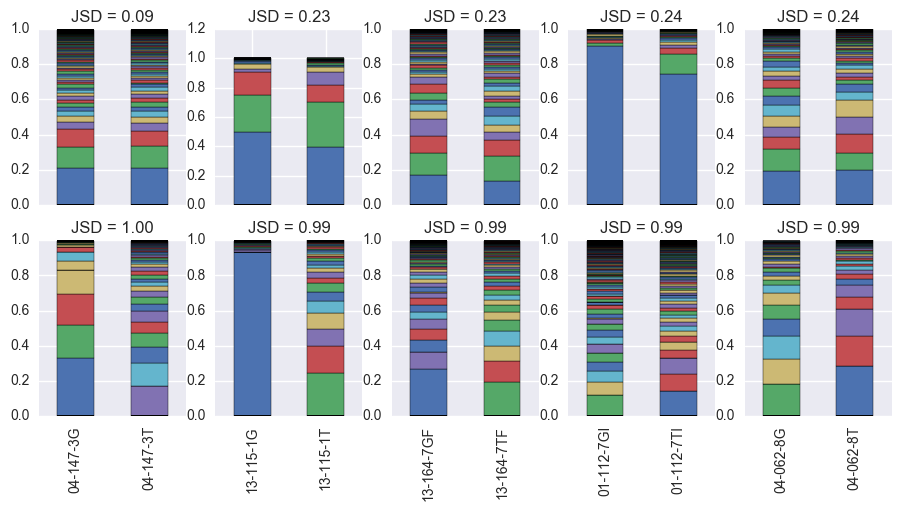

In [43]:
fig, ax = plt.subplots(2,5, figsize=(11,5))

for i in range(5):
    # Most similar
    s1 = thrgas.iloc[i]['sample1']
    s2 = thrgas.iloc[i]['sample2']
    cols = df.loc[[s1, s2]].sum().sort_values(ascending=False).index
    df.loc[[s1, s2], cols].plot(kind='bar', stacked=True, legend=False, ax=ax[0, i])
    ax[0, i].set_title('JSD = {:.2f}'.format(thrgas.iloc[i]['jsd']))
    ax[0, i].set_xticklabels(['',''])
    print(s1)
    print('\n'.join(cols[0:5]))
    print('\n')
    
    # Least similar
    s1 = thrgas.iloc[-(i+1)]['sample1']
    s2 = thrgas.iloc[-(i+1)]['sample2']
    cols = df.loc[[s1, s2]].sum().sort_values(ascending=False).index
    df.loc[[s1, s2], cols].plot(kind='bar', stacked=True, legend=False, ax=ax[1, i])
    ax[1, i].set_title('JSD = {:.2f}'.format(thrgas.iloc[-(i+1)]['jsd']))


## Average lung and gastric communities

In [30]:
bal_samples = meta.query('site == "bal"').index
gas_samples = meta.query('site == "gastric_fluid"').index

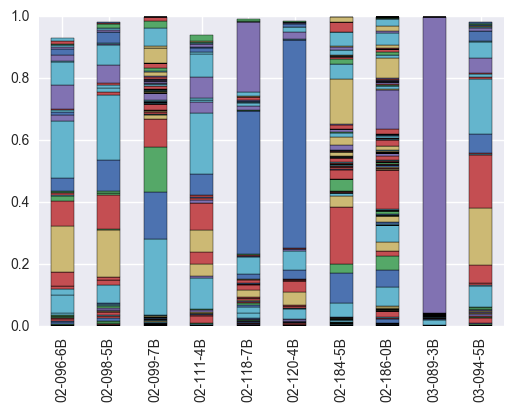

In [33]:
df.loc[bal_samples[0:10]].plot(kind='bar', stacked=True, legend=False)

In [44]:
df.loc[bal_samples[0:10]].sum(axis=1).sort_values()

02-096-6B    0.929302
02-111-4B    0.938000
03-094-5B    0.980757
02-098-5B    0.982737
02-120-4B    0.985028
02-118-7B    0.989911
02-184-5B    0.996208
02-186-0B    0.998197
02-099-7B    0.998866
03-089-3B    0.999203
dtype: float64

In [52]:
s = '02-096-6B'
df.loc[s].replace(0, np.nan).dropna().sort_values(ascending=False)

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Enterobacter;s__;d__denovo40             0.183986
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus;s__;d__denovo96                                  0.145656
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Leuconostocaceae;g__Leuconostoc;s__;d__denovo98                                  0.083475
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__;d__denovo159                  0.077513
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus;s__;d__denovo155                                 0.074106
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Leuconostocaceae;g__Weissella;s__;d__denovo137                                   0.057070
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;

In [55]:
df.sum(axis=1).sort_values()

04-023-4B     0.840590
01-209-2R     0.879151
02-096-6B     0.929302
13-104-0B     0.934126
04-036-5G     0.934184
03-109-3B     0.934385
04-265-2B     0.934681
05-005-8G     0.937223
02-111-4B     0.938000
02-096-6G     0.950820
03-114-6B     0.954089
03-113-4B     0.954586
13-106-3B     0.955929
03-105-2B     0.959251
04-042-7G     0.963468
04-041-3B     0.965333
03-089-3G     0.967544
04-064-5B     0.972679
04-042-7B     0.972961
04-023-4G     0.973667
03-137-6B     0.974591
05-163-7T     0.974839
03-107-4B     0.975759
05-004-1B     0.976062
04-156-8G     0.977316
04-006-9B     0.977667
13-104-0G     0.978848
12-100-3B     0.978971
13-117-4G     0.979025
04-011-3G     0.979112
                ...   
04-115-7T     0.999439
03-109-3T     0.999476
05-142-4T     0.999480
05-178-4T     0.999481
04-150-1T     0.999498
04-153-6T     0.999504
04-129-7T     0.999515
04-172-0T     0.999555
04-162-5G     0.999560
13-115-1T     0.999567
04-162-5T     0.999567
13-110-5T     0.999570
04-063-7T  